In [84]:
import math
import matplotlib.pyplot as plt
import matplotlib.units as units
import numpy as np
from scipy import signal
import control

<h2> Computer Assignment 4 </h2>

### Grippa, Luke  

<p> <strong>1) (20%)</strong> Plot the frequency response of the system $|H(e^{jω})| = |H(z)| \vert_{z=e^{j\omega}}$ for $\omega_c = \pi /4$ and $Q = 10$, for $\omega \in [−\pi, \pi]$. Use decibels for the y-axis. Is the notch where you expect? </p>

<p> $|H(z)| = |\frac{(4+\omega_c^{2}) + (2\omega_c^{2} - 8)z^{-1} + (4 + \omega_c^{2})z^{-2}}{(4+\frac{\omega_c}{Q} + \omega_c^{2}) + (2\omega_c^{2} - 8)z^{-1} + (4 - \frac{\omega_c}{Q}+\omega_c^{2})z^{-2}}|$ </p> 

<p> $|H(e^{j\omega})| = |\frac{(4+\omega_c^{2}) + (2\omega_c^{2} - 8)e^{-j\omega} + (4 + \omega_c^{2})e^{-2j\omega}}{(4+\frac{\omega_c}{Q} + \omega_c^{2}) + (2\omega_c^{2} - 8)e^{-j\omega} + (4 - \frac{\omega_c}{Q}+\omega_c^{2})e^{-2j\omega}}|$ </p>

<p> $|H(e^{j\omega})| = |\frac{(4+(\frac{\pi}{4})^{2}) + (2(\frac{\pi}{4})^{2} - 8)e^{-j\omega} + (4 + (\frac{\pi}{4})^{2})e^{-2j\omega}}{(4+\frac{\pi}{4*10} + (\frac{\pi}{4})^{2}) + (2(\frac{\pi}{4})^{2} - 8)e^{-j\omega} + (4 - \frac{\pi}{4*10}+(\frac{\pi}{4})^{2})e^{-2j\omega}}|$ when $\omega_c = \pi /4$ and $Q = 10$</p>

<p> $ $ </p>

<h4> Yes, the notch is where I would have expected it to be, the notch is at $ \pi/4 $. As $Q$ gets closer to $0$, the filter attenuates more of the surrounding frequenices, as $Q$ gets larger the filter attenuates frquencies very close to the center frequency $\pi/4$ </h4>

<p> $ $ </p>


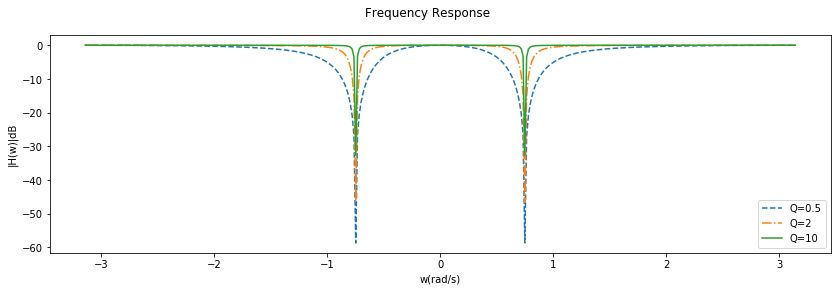

In [40]:
# magnitude of the frequency response in decibels

w = np.linspace(-np.pi, np.pi, 400)

def H(z, wc, Q):
    return ((4+wc**2) + (2*(wc**2) - 8)*(z**(-1)) + (4+wc**2)*(z**(-2))) \
    / ((4+(wc/Q)+(wc**2)) + (2*(wc**2)-8)*(z**(-1)) + (4-(wc/Q)+(wc**2))*(z**(-2)))

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('Frequency Response')
fig.set_size_inches(14, 4)

ax1.plot(w, 20*np.log10(abs(H(np.exp(1j*w), np.pi/4, 0.5))), '--', label='Q=0.5') # Q = 0.5
ax1.plot(w, 20*np.log10(abs(H(np.exp(1j*w), np.pi/4, 2))), '-.', label='Q=2')     # Q = 2
ax1.plot(w, 20*np.log10(abs(H(np.exp(1j*w), np.pi/4, 10))), label='Q=10')         # Q = 10

ax1.set_xlabel('w(rad/s)')
ax1.set_ylabel('|H(w)|dB')
#ax1.set_ylim(-20.0, 40.0)

ax1.legend(loc='lower right')

<p> <strong> 2) (25%)</strong>  Implement a function that implements  the time-domain filter. The function takes as inputs (argument 1) a vector representing a segment of a discrete-time signal, (argument 2) the value of $\omega_c$, and (argument 3) the value of $Q$. Write the code to implement the filter using the above equation and a for loop to iterate across the time points. Do not use any built-in filtering functions. </p>

<p> $y[n] = \frac{1}{(4+\frac{\omega_c}{Q} + \omega_c^{2})} ((4+\omega_c^{2})x[n] + (2\omega_c^{2} - 8)x[n-1] + (4 + \omega_c^{2})x[n-2] - (2\omega_c^{2} - 8)y[n-1] - (4 - \frac{\omega_c}{Q}+\omega_c^{2})y[n-2]) $ </p>

<p> $ $ </p>

In [157]:
# time-domain filter implementation
def y(x, wc, Q):
    y1 = np.empty(len(x))
    for n in range(len(x)):
        if (n < 1):
            y1[n] = (1 / (4+(wc/Q)+(wc**2))) * ((4+wc**2) * x[n])
        elif (n <= 2):
             y1[n] = (1/(4+(wc/Q)+(wc**2))) * ((4+wc**2)*x[n] + (2*(wc**2) - 8)*(x[n-1]) \
                    - (2*(wc**2)-8)*(y1[n-1]))
        elif (n >2):
            y1[n] = (1/(4+(wc/Q)+(wc**2))) * ((4+wc**2)*x[n] + (2*(wc**2) - 8)*(x[n-1]) + (4+wc**2)*(x[n-2]) \
                  - (2*(wc**2)-8)*(y1[n-1]) - (4-(wc/Q)+(wc**2))*(y1[n-2]))
    return y1


                                   

<p> <strong> 3) (10%)</strong>  Suppose the sampling frequency is $f_s = 44100 Hz = 44.1 kHz$, what is $\omega_c$ if the goal is to remove $60 Hz$ noise? Is the system stable, how do you check, and does the stability depend
on the value of $Q$?</p>

<p> $\omega_c = \frac{2\pi f_c}{f_s} = \frac{2\pi * 60 Hz}{44100Hz}$ </p>

<p> $\omega_c = 0.0085 $ </p>

<h4> Yes, the system is stable. A causal LTI system with rational system function $H(z)$ is stable if and only if all of the poles of $H(z)$ lie inside the unit circle. </h4>

<h4> When $Q = 0.5$, $H(z)$ has poles at $z = 0.99570761+0.00737162j$ and $z = 0.99570761-0.00737162j$</h4>
<h4> When $Q = 10$, $H(z)$ has poles at $z = 0.99974981+0.0085439j$ and $z = 0.99974981-0.0085439j$</h4>
<h4> When $Q = 100$, $H(z)$ has poles at $z = 0.99974981+0.0085439j$ and $z = 0.99974981-0.0085439j$</h4>

<h4> No, the stability does no depend on the value of Q. As Q increase the poles approach 1.0 but never reach it. </h4>

In [214]:
wc = (2 * np.pi * 60) / 44100 # get wc from above calculation
Q1 = 0.5
Q2 = 10
Q3 = 100

# numerator polynomial coefficients
def b(wc):
    return [(4+(wc)**2), (2*((wc)**2) - 8),(4+(wc)**2)]

# denominator polynomial coefficients
def a(wc, Q):
    return [(4+((wc)/Q)+((wc)**2)), (2*((wc)**2)-8), (4-((wc)/Q)+((wc)**2))] # Q = 0.5

# creates a transfer function for the systems with different Q values
sys1 = control.TransferFunction(b(wc), a1(wc, Q1),True)  # Q = 0.5
sys2 = control.TransferFunction(b(wc), a1(wc, Q2),True)  # Q = 10
sys3 = control.TransferFunction(b(wc), a1(wc, Q3),True)  # Q = 100

# calculates the poles based on the transfer functions we created above
p_sys1 = control.pole(sys1) # calculates poles
p_sys2 = control.pole(sys2) # calculates poles
p_sys3 = control.pole(sys3) # calculates poles

p_sys1_mag = abs(p_sys1)
p_sys2_mag = abs(p_sys2)
p_sys3_mag = abs(p_sys3)

print(p_sys1)
print(p_sys2)
print(p_sys2)

print('When Q = 0.5, H(z) has poles at z = %.8f and z = %.8f' % (p_sys1_mag[0], p_sys1_mag[1]))
print('\n')

print('When Q = 10, H(z) has poles at z = %.8f and z = %.8f' % (p_sys2_mag[0], p_sys2_mag[1]))
print('\n')

print('When Q = 100, H(z) has poles at z = %.8f and z = %.8f' % (p_sys3_mag[0], p_sys3_mag[1]))
print('\n')


#control.pzmap(sys1, True)
#control.pzmap(sys2, True)
#control.pzmap(sys3, True)


[0.99570761+0.00737162j 0.99570761-0.00737162j]
[0.99974981+0.0085439j 0.99974981-0.0085439j]
[0.99974981+0.0085439j 0.99974981-0.0085439j]
When Q = 0.5, H(z) has poles at z = 0.99573490 and z = 0.99573490


When Q = 10, H(z) has poles at z = 0.99978631 and z = 0.99978631


When Q = 100, H(z) has poles at z = 0.99997863 and z = 0.99997863




<p> <strong>4) (5%)</strong> At this sampling frequency what is the upper bound on the frequency a signal can have
to avoid aliasing? </p>

<p> </p>

<h4> I order to preserve the signal and avoid aliasing the upper bound of the frequency that the signal can have is half of the sampling frequency. The sampling theorem states that the sampling frequency must be greater than twice the maximum frequency of the signal therefore the maximum frequency of the signal is half the sampling frequency.</h4>

<p> $ \omega_s > 2\omega_m \Longrightarrow  \omega_m < \frac{1}{2}\omega_s$ </p>

<p> Therefore, the upper bound on the frequency a signal can have at this sampling rate to avoid aliasing is, </p>

<p> $ \omega_m < \frac{1}{2}44.1kHz \Longrightarrow \omega_m < 22.05 kHz = 22,050 Hz$ </p>

<p> $ $ </p>

<p> <strong>5) (5%)</strong> Given this sampling frequency, create sampled versions of the signals $x_1(t) = \sin(122\pi t)$, $x_2(t) = \sin(120\pi t)$, and $x_3(t) = \sin(200\pi t)$ such that the duration is approximately 5 seconds. </p>


In [172]:
# 44,100 Hz = 44,100 samples per second, 44,100 Hz x 5 seconds = 220,500 samples 
n = np.arange(0, 5, 1/44100)
    
# function definitions    
def x1(t):   
    return np.sin(122*np.pi*t) # 61 Hz

def x2(t):
    return np.sin(120*np.pi*t) # 60 Hz

def x3(t):
    return np.sin(200*np.pi*t) # 100 Hz

# initialize empty numpy array the size of 5 second sampled versions
x1 = x1(n)
x2 = x2(n)
x3 = x3(n)

print(x1)
print(x2)
print(x3)

[ 0.          0.00869092  0.01738118 ... -0.02607013 -0.01738118
 -0.00869092]
[ 0.          0.00854845  0.01709627 ... -0.02564284 -0.01709627
 -0.00854845]
[ 0.          0.0142471   0.02849132 ... -0.04272974 -0.02849132
 -0.0142471 ]


<p> <strong> </strong> </p>

<p> <strong>6) (15%)</strong> Process each of the signals using the function you wrote with the value of $\omega_c$ you determined and the value of $Q = 100$. For each signal plot the original signal and the output, overlaid in the same plot. (3 figures or 1 figure with 3 subplots). Make sure to label the axes
and put a title that includes the value of $Q$. </p>

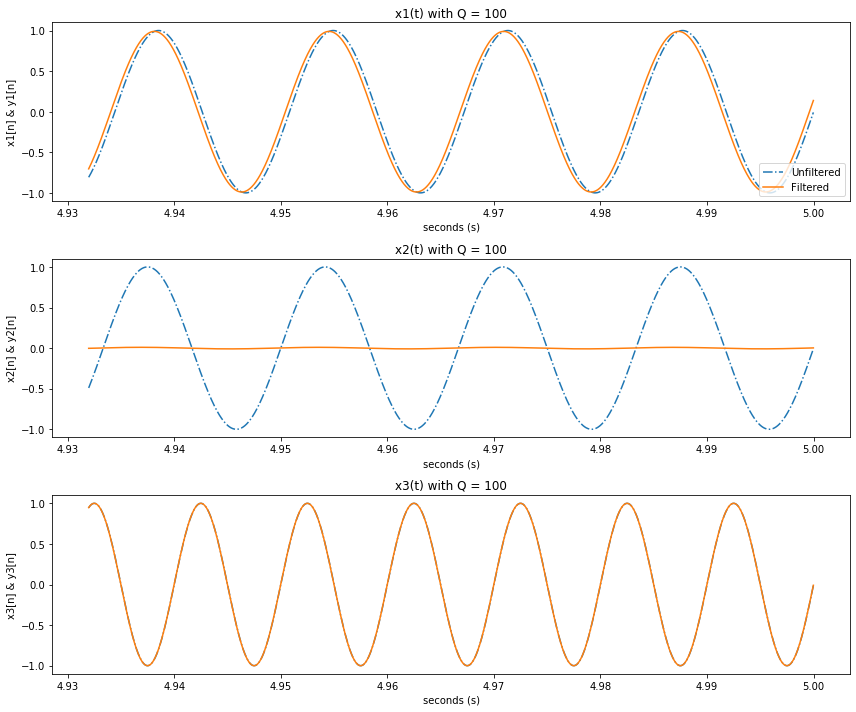

In [191]:
Q100 = 100

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
#fig.suptitle('Q = 100')
fig.set_size_inches(12, 10)


# plot x1[n] and y1[n]
ax1.plot(n[217500:220500], x1[217500:220500], '-.', label='Unfiltered')        # x1[n] unfiltered 
ax1.plot(n[217500:220500], y(x1, wc, Q100)[217500:220500], label='Filtered')   # x1[n] filtered

ax1.set_xlabel('seconds (s)')
ax1.set_ylabel('x1[n] & y1[n]')
ax1.title.set_text('x1(t) with Q = 100')

# plot x2[n] and y2[n]
ax2.plot(n[217500:220500], x2[217500:220500], '-.', label='Unfiltered')        # x2[n] unfiltered 
ax2.plot(n[217500:220500], y(x2, wc, Q100)[217500:220500], label='Filtered')   # x2[n] filtered

ax2.set_xlabel('seconds (s)')
ax2.set_ylabel('x2[n] & y2[n]')
ax2.title.set_text('x2(t) with Q = 100')


# plot x3[n] and y3[n]
ax3.plot(n[217500:220500], x3[217500:220500], '-.', label='Unfiltered')        # x3[n] unfiltered 
ax3.plot(n[217500:220500], y(x3, wc, Q100)[217500:220500], label='Filtered')   # x3[n] filtered

ax3.set_xlabel('seconds (s)')
ax3.set_ylabel('x3[n] & y3[n]')
ax3.title.set_text('x3(t) with Q = 100')


ax1.legend(loc='lower right')
plt.tight_layout()

<p> <strong>7) (10%)</strong> Repeat the previous step for $Q = 200$. </p>

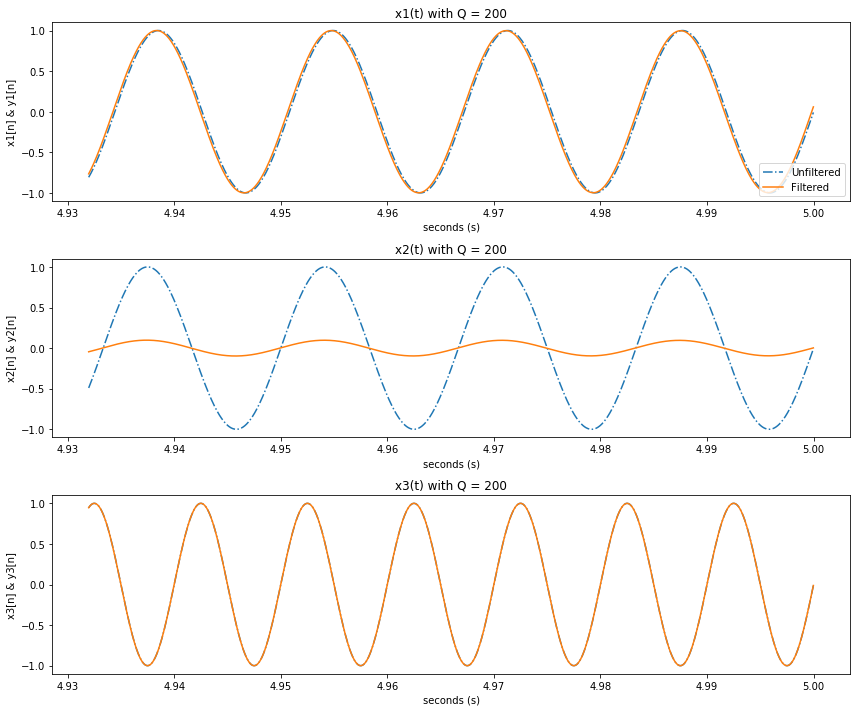

In [192]:
Q200 = 200

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
#fig.suptitle('Q = 200')
fig.set_size_inches(12, 10)


# plot x1[n] and y1[n]
ax1.plot(n[217500:220500], x1[217500:220500], '-.', label='Unfiltered')        # x1[n] unfiltered 
ax1.plot(n[217500:220500], y(x1, wc, Q200)[217500:220500], label='Filtered')   # x1[n] filtered

ax1.set_xlabel('seconds (s)')
ax1.set_ylabel('x1[n] & y1[n]')
ax1.title.set_text('x1(t) with Q = 200')

# plot x2[n] and y2[n]
ax2.plot(n[217500:220500], x2[217500:220500], '-.', label='Unfiltered')        # x2[n] unfiltered 
ax2.plot(n[217500:220500], y(x2, wc, Q200)[217500:220500], label='Filtered')   # x2[n] filtered

ax2.set_xlabel('seconds (s)')
ax2.set_ylabel('x2[n] & y2[n]')
ax2.title.set_text('x2(t) with Q = 200')


# plot x3[n] and y3[n]
ax3.plot(n[217500:220500], x3[217500:220500], '-.', label='Unfiltered')        # x3[n] unfiltered 
ax3.plot(n[217500:220500], y(x3, wc, Q200)[217500:220500], label='Filtered')   # x3[n] filtered

ax3.set_xlabel('seconds (s)')
ax3.set_ylabel('x3[n] & y3[n]')
ax3.title.set_text('x3(t) with Q = 200')


ax1.legend(loc='lower right')
plt.tight_layout()

<p> <strong>8) (10%)</strong> Create a discrete-time unit impulse signal with duration $0.1 seconds$, use it as input to the system you implemented for $Q = 10$, $Q = 50$, and $Q = 100$. Plot the three impulses in the
same graph.</p>

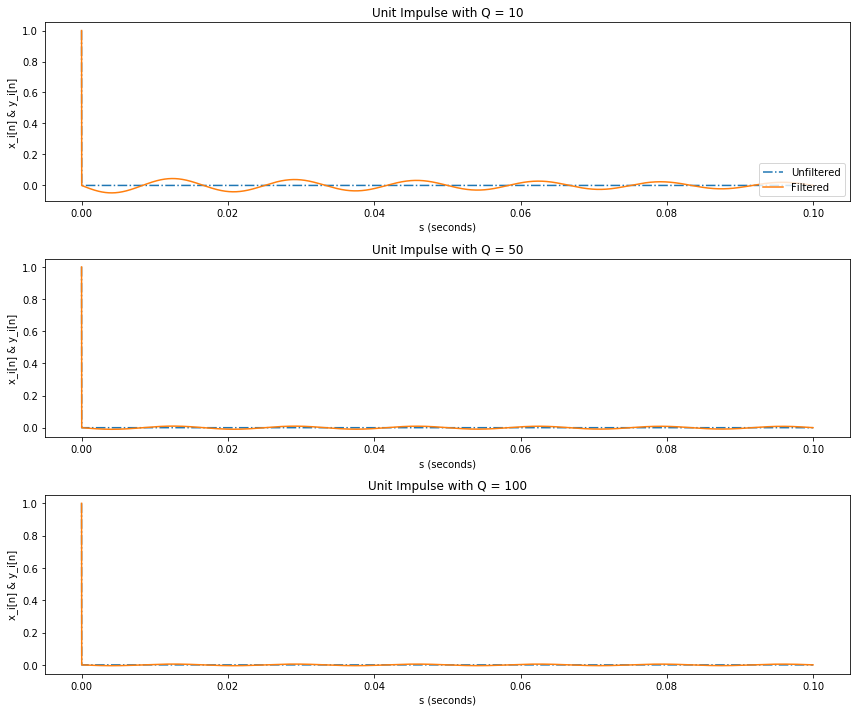

In [194]:
x_i = signal.unit_impulse(4410) # unit impulse function with length 4410
n_i = np.arange(0, 0.1, 1/44100)

Q10 = 10
Q50 = 50
Q100 = 100

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(12, 10)


# plot x_i[n] and y_i[n] for Q = 10
ax1.plot(n_i, x_i, '-.', label='Unfiltered')        # x1[n] unfiltered 
ax1.plot(n_i, y(x_i, wc, Q10), label='Filtered')   # x1[n] filtered

ax1.set_xlabel('s (seconds)')
ax1.set_ylabel('x_i[n] & y_i[n]')
ax1.title.set_text('Unit Impulse with Q = 10')

# plot x_i[n] and y_i[n] for Q = 50
ax2.plot(n_i, x_i, '-.', label='Unfiltered')        # x2[n] unfiltered 
ax2.plot(n_i, y(x_i, wc, Q50), label='Filtered')   # x2[n] filtered

ax2.set_xlabel('s (seconds)')
ax2.set_ylabel('x_i[n] & y_i[n]')
ax2.title.set_text('Unit Impulse with Q = 50')


# plot x_i[n] and y_i[n] for Q = 100
ax3.plot(n_i, x_i, '-.', label='Unfiltered')        # x3[n] unfiltered 
ax3.plot(n_i, y(x_i, wc, Q100), label='Filtered')   # x3[n] filtered

ax3.set_xlabel('s (seconds)')
ax3.set_ylabel('x_i[n] & y_i[n]')
ax3.title.set_text('Unit Impulse with Q = 100')


ax1.legend(loc='lower right')
plt.tight_layout()